In [1]:
# 5.1 实例化一个小型的卷积神经网络
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 在卷积神经网络上添加分类器
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [5]:
# 在mnist图像上训练卷积神经网络
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
60000/60000 [==============================] - 6s 92us/step - loss: 0.1676 - accuracy: 0.9469
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0464 - accuracy: 0.9852
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0323 - accuracy: 0.9899
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0253 - accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0202 - accuracy: 0.9937


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/step


In [7]:
test_acc

0.9922999739646912

In [8]:
model_no_max_pooling = models.Sequential()
model_no_max_pooling.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_no_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_no_max_pooling.add(layers.Conv2D(64, (3, 3), activation='relu'))

model_no_max_pooling.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 猫狗数据集
# 2000个训练图像，1000个验证图像，1000个测试图像
# 整理数据
import os, shutil

# 原始数据
original_dataset_dir = 'dogs-vs-cats/'
train_dataset_dir = 'dogs-vs-cats/train'
test1_dataset_dir  = 'dogs-vs-cats/test1'

# 保存较小数据集
# 检测文件
base_dir = 'dogs-vs-cats/cats_and_dogs_small'
if os.path.exists(base_dir):
    # os.remove(original_dataset_dir)
    shutil.rmtree(base_dir)

os.mkdir(base_dir)

# 
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 狗的训练图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 猫的测试图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 将前1000张猫的图像复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname) # 原本训练集猫图像
    dst = os.path.join(train_cats_dir, fname) # 分割后训练集猫图像
    shutil.copyfile(src, dst)

#  将剩下的500张猫的图像复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来的500张猫图片复制到test_cats_dir中
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 前1000张狗照片到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 接下来500张狗照片复制到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 接下来500张狗照片复制到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
# 构建网络
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [11]:
# 配置模型用于训练
from keras import optimizers 

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics = ['acc']
)

In [12]:
# 使用工具从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator

# 将所有图像乘以1/255缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [14]:
# 利用批量生成器拟合模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6923 - acc: 0.5325 - val_loss: 0.6401 - val_acc: 0.5830
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6582 - acc: 0.6230 - val_loss: 0.6034 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6101 - acc: 0.6655 - val_loss: 0.5224 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5739 - acc: 0.6935 - val_loss: 0.5006 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 7s 67ms/step - loss: 0.5479 - acc: 0.7145 - val_loss: 0.5863 - val_acc: 0.6880
Epoch 6/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5160 - acc: 0.7390 - val_loss: 0.6726 - val_acc: 0.6630
Epoch 7/30
100/100 [==============================] - 7s 67ms/step - loss: 0.4973 - acc: 0.7495 - val_loss: 0.5059 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 7s 68ms/step - 

In [15]:
# 保存模型
model.save('cats_and_dogs_small_1.h5')

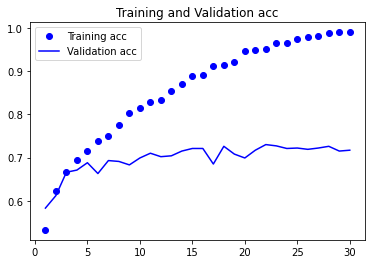

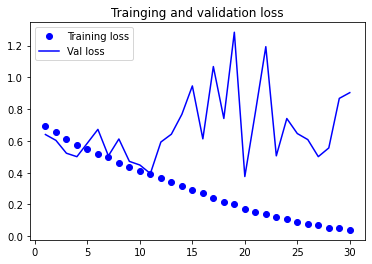

In [16]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.title('Trainging and validation loss')
plt.legend()

plt.show()



In [17]:
# 使用数据增强-学习样本少导致过拟合
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0,
    horizontal_flip=True,
    fill_mode='nearest'
)

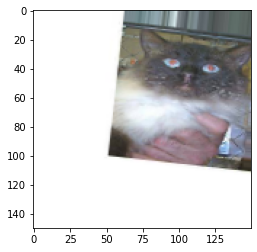

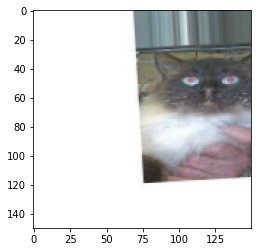

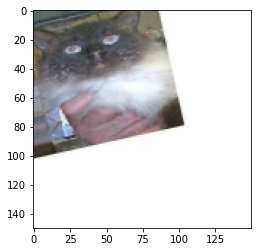

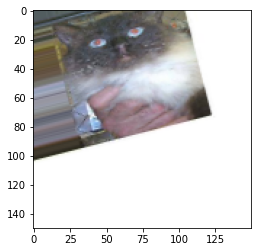

In [18]:
# 显示几个随机增强后的训练图像
# 图像预处理工具的模块
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
# 选择一张图像进行增强
img_path = fnames[3]
# 读取图像并调整大小
img = image.load_img(img_path, target_size=(150, 150))

# 转换array数组
x = image.img_to_array(img)
# 改变形状（1， 150， 150， 3）
x = x.reshape((1,) + x.shape )

i = 0

# 生成随机变换后的图像批量。
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [19]:
# 定义一个包含dropout的新卷积神经网络
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-4),
    metrics = ['acc']
)



In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [22]:
# 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 训练生成器
train_generator = train_datagen.flow_from_directory(
    # 目标目录
    train_dir,
    # 将图像大小调整为150，150
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# 验证生成器
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6936 - acc: 0.5098 - val_loss: 0.6777 - val_acc: 0.5609
Epoch 2/100
100/100 [==============================] - 19s 189ms/step - loss: 0.6806 - acc: 0.5575 - val_loss: 0.6538 - val_acc: 0.5728
Epoch 3/100
100/100 [==============================] - 18s 185ms/step - loss: 0.6664 - acc: 0.5956 - val_loss: 0.5768 - val_acc: 0.6453
Epoch 4/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6483 - acc: 0.6165 - val_loss: 0.6962 - val_acc: 0.6366
Epoch 5/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6324 - acc: 0.6360 - val_loss: 0.8696 - val_acc: 0.5489
Epoch 6/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6129 - acc: 0.6626 - val_loss: 0.6125 - val_acc: 0.7049
Epoch 7/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6026 - acc: 0.6705 -

In [23]:
# 保存模型
model.save('cats_and_dogs_small_2.h5')

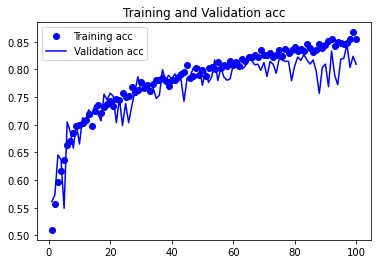

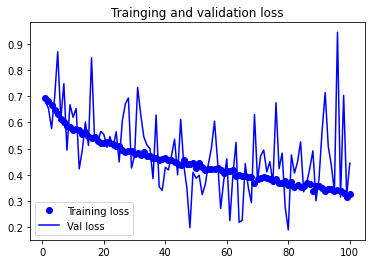

In [24]:
# 绘制训练曲线
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.title('Trainging and validation loss')
plt.legend()

plt.show()

In [25]:
# 将VGG16卷积基实例化
from keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58892288/58889256 [==============================] - 65s 1us/step


In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [27]:
# 使用预训练的卷积基提取特征
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size = batch_size,
        class_mode='binary'
    )
    
    i = 0

    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    
    return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
# 将数据平展为(samples, 8192)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


In [30]:
# 定义并训练密集连接分类器
from keras import optimizers, models, layers


model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim= 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=2e-5),
    loss='binary_crossentropy',
    metrics = ['acc'] 
)

history = model.fit(
    train_features, train_labels,
    epochs = 30,
    batch_size = 20, 
    validation_data = (validation_features, validation_labels)
)

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 0s 204us/step - loss: 0.6029 - acc: 0.6670 - val_loss: 0.4492 - val_acc: 0.8470
Epoch 2/30
2000/2000 [==============================] - 0s 155us/step - loss: 0.4231 - acc: 0.8100 - val_loss: 0.3599 - val_acc: 0.8820
Epoch 3/30
2000/2000 [==============================] - 0s 156us/step - loss: 0.3595 - acc: 0.8490 - val_loss: 0.3380 - val_acc: 0.8580
Epoch 4/30
2000/2000 [==============================] - 0s 155us/step - loss: 0.3262 - acc: 0.8590 - val_loss: 0.2989 - val_acc: 0.8950
Epoch 5/30
2000/2000 [==============================] - 0s 155us/step - loss: 0.2844 - acc: 0.8890 - val_loss: 0.2838 - val_acc: 0.8990
Epoch 6/30
2000/2000 [==============================] - 0s 154us/step - loss: 0.2639 - acc: 0.8890 - val_loss: 0.2755 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 0s 169us/step - loss: 0.2507 - acc: 0.8970 - val_loss: 0.2714 - val_acc: 0.8980


In [ ]:
# 绘制结果
import matplotlib.pyplot as plt 